# COGS 108 - Final Project 

# Overview

I am interested in looking at the relationships between average yelp review scores, number of parks and number of crimes per street located in San Diego. I used datasets with police calling in 2019 and 2020 in San Diego. In addition, I used a dataset with yelp reviews of the parks in San Diego to do analysis for this project. From the analysis, a slight negative correlation between number of crimes and average yelp ratings per street was found. A positive correlation between the number of crimes and the number of parks per street was also observed. 

# Name & GitHub

- Name: Cheuk King Ku
- GitHub Username: Ivoryku

# Research Question

How can the San Diego Parks and Rec Department make better decisions on future parks' location based on the relationship between the popularity of a street (based on the average yelp reviews given to parks on the same street), the number of parks per street  and the number of crimes per street? 

## Background and Prior Work

Living in the world with technologies such as social media extremely accessible to us for entertainment, it is easy to forget that going to parks not only serves as an entertainment but it also benefits us in various aspects. According to an article "8 Reasons Why Parks are Important", it states that parks provide a space for socializing and also a sense of community. Increasing the number of parks in a neighborhood will also decrease the number of crimes because younger people that spend more time in parks tend to spend less time causing trouble. They also stated an increase of number of people in the park gives more stress to those who intend to commit crime; thus creating a safer environment for visitors. This article gives a different perspective to how I view the relationship between the variables I am interested in, but it will be interesting to see which hypothesis will the result this project matches. 

On the other hand, a park's ratings also have a correlation with the popularity and crime rate of the park. According to a research article from CDC, "Effects of Crime Type and Location on Park Use Behavior", the study result states that parks with higher crime rates obtained a lower rating and also seemed to be less popular. Through background researching, the articles demonstrated that parks and the safety of their locations are important to a neighborhood. As a result, it is crucial for the Parks and Recreation Department to do analysis on the surroundings of the parks in order to create and maintain a safe environment for people who access the parks frequently. 

References (include links):
- 1) http://www.gardinergreenribbon.com/why-parks-are-important/
- 2) https://www.cdc.gov/pcd/issues/2020/19_0434.htm

# Hypothesis


I hypothesize that streets with more parks will have a higher crime rate and lower average yelp review scores because more people will be accessing the parks if there are multiple parks on the same street which also gives criminals more targets to commit crime on. With more crimes happening on these streets, the surrounding of the parks became worse and thus the reviews of these pakrs will be reduced. 

# Dataset(s)

All 3 Datasets are provided by the professor of this course. 

- Dataset Name: San Diego Parks Yelp Data 
- Link to the dataset:  https://www.yelp.com/developers/documentation/v3/business_search
- Number of observations: 833
- Description: This dataset will be used to identify how many parks are located on each street and the streets' popularity will be determined through combining the parks' average yelp review scores.   


- Dataset Name: San Diego Crime Data (2019)
- Link to the dataset: https://data.sandiego.gov/datasets/police-calls-for-service/
- Number of observations: 590967
- Description: This dataset will be used to match the address of the parks and to determine how many crimes occurred on a specific street with parks on the street in 2019. 


- Dataset Name: San Diego Crime Data (2020)
- Link to the dataset: https://data.sandiego.gov/datasets/police-calls-for-service/
- Number of observations: 522569
- Description:  This dataset will be used to match the address of the parks and to determine how many crimes occurred on a specific street with parks on the street in 2020. 


I plan to standardize the address columns of the San Diego crime datasets then merge the two datasets into one dataframe and cross reference it with the addresses in San Diego Yelp dataset which will result to one dataframe with the total number of parks and yelp review counts and average yelp review scores on each street that has crime occurred in the year of 2019 and 2020. 

# Setup

In [1]:
# Imports 
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

from scipy.stats import uniform, norm, bernoulli, poisson

import warnings
warnings.filterwarnings('ignore')



# Data Cleaning

Loading the Datasets used for this analysis

In [2]:
crime_2019_df = pd.read_csv('pd_calls_for_service_2019_datasd.csv')
crime_2020_df = pd.read_csv('pd_calls_for_service_2020_datasd.csv')
yelp_parks_df = pd.read_csv('yelp_SD_parks.csv')

## Removing columns 

I removed columns that are unnecessary for my analysis. For the San Diego crime datasets, I removed the incident number column which might be used to identify cases in order to avoid unethical usage. In addition, columns that are irrelevant for the purpose of this project is dropped. For the Yelp parks datasets, I removed columns with restaurant's personal information and data that are irrelevant to my analysis. 



In [3]:
crime_2019_df = crime_2019_df.drop(['incident_num','address_dir_primary','address_dir_intersecting',
                                    'address_road_intersecting','address_sfx_intersecting','call_type',
                                    'disposition','beat','priority'], axis=1)
crime_2020_df = crime_2020_df.drop(['incident_num','address_dir_primary','address_dir_intersecting',
                                    'address_road_intersecting','address_sfx_intersecting','call_type',
                                    'disposition','beat','priority'], axis=1)

In [4]:
yelp_parks_df = yelp_parks_df.drop(['phone', 'id','url','is_closed','longitude','latitude'], axis=1)

## Merging and standardizing San Diego Crime dataframe

In order to effectively analyze the data in San Diego crime data sets, I merged the San Diego crime datasets 2019 and 2020 into one dataframe, crime_df. Then, I standardized the data, specifically the address columns. 

In [5]:
#Merging SD 2019 and 2020 crime datasets
crime_df = crime_2019_df.append(crime_2020_df,  ignore_index=True)

In [6]:
#Converting address with int to str 
crime_df['address_number_primary'] = crime_df['address_number_primary'].apply(str)
crime_df['address_road_primary'] = crime_df['address_road_primary'].apply(str)
crime_df['address_sfx_primary'] = crime_df['address_sfx_primary'].apply(str)

yelp_parks_df['address'] = yelp_parks_df['address'].apply(str)

In [7]:
#Merging columns into one address column and dropping extra columns 
crime_df['street_number'] = crime_df['address_number_primary']
crime_df['street'] = crime_df[['address_road_primary',
                                          'address_sfx_primary']].apply(lambda x: ' '.join(x), axis = 1) 

crime_df = crime_df.drop(['address_number_primary', 'address_road_primary','address_sfx_primary'], axis =1)

In [8]:
#Converting uppercase to lowercase on street
crime_df['street'] = crime_df['street'].str.lower()
yelp_parks_df['address'] = yelp_parks_df['address'].str.lower()

In [9]:
#Creating a new dataframe that has a column with total crime count per street 
crime_rate_df = crime_df['street'].value_counts().rename_axis('street').reset_index(name='count')
crime_rate_df

,street,count
0,imperial ave,18984
1,el cajon blv,18962
2,university ave,18503
3,05th ave,14872
4,broadway nan,11060
...,...,...
15250,cam santa fe nan,1
15251,ofcr higgins nan,1
15252,lindgren nan,1
15253,- ofcr contreras or del toro nan,1


## Visualization check before further cleaning 
After looking at an initial plot with data in crime_rate_df, I saw there are a lot of streets with only 1 crime count which may potentially create outliers in my final analysis, so I dropped rows that are at the bottom 1% range. 

Text(0, 0.5, 'number of crimes')

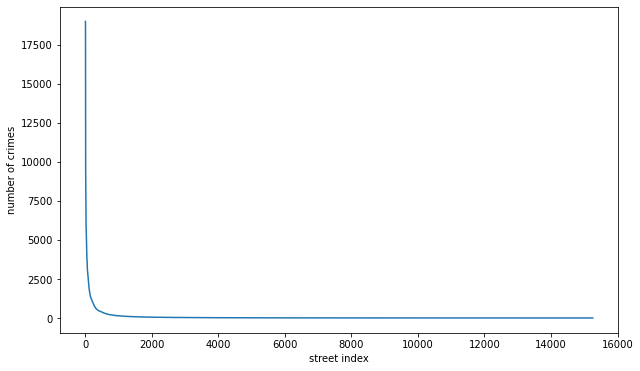

In [10]:
plt.figure(figsize = (10,6))
plt.plot(crime_rate_df.index, crime_rate_df['count'])
plt.xlabel('street index')
plt.ylabel('number of crimes')

In [11]:
#Dropping the bottom 1% of crime rates
crime_rate_df = crime_rate_df[crime_rate_df['count'] > float(max(crime_rate_df['count']) * 0.05)]

Text(0, 0.5, 'number of crimes')

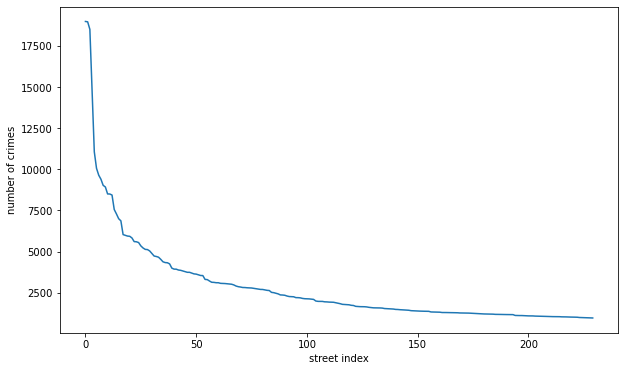

In [12]:
#Plot of crime_rate_df after dropping bottom 1%
plt.figure(figsize = (10,6))
plt.plot(crime_rate_df.index, crime_rate_df['count'])
plt.xlabel('street index')
plt.ylabel('number of crimes')

In [13]:
crime_rate_df = crime_rate_df.rename(columns = {'count' : 'crime_count'})

## Cross Referencing Yelp parks and Crime rate df

In order to determine the popularity of the streets with the datasets given, I tried to develop a code that will cross reference between the yelp_parks_df and the crime_rate_df. If the streets on the crime_rate_df also matches the park's address on the yelp_parks_df, then the number of parks, total average parks' ratings and total review counts will be summed up and stored in dataframes. 

After the cross referencing process, I added the dataframes as new columns of the crime_rate_df. Therefore, the new crime_rate_df includes each street and also the crime count, park count, average yelp review score and total review count per street. 

In [14]:
#Cross referencing street names in the crime rate dataframe to yelp parks dataframe
value = []
avg_rating = []
review_count = []
for x in crime_rate_df['street']:
    
    count = 0
    rating_sum = pd.DataFrame(columns = ['rating'])
    review_count_sum = pd.DataFrame(columns = ['review_count'])
    
    for y in yelp_parks_df['address']:
        
        if x in y:    
            count += 1
            rating_sum = rating_sum.append(yelp_parks_df.loc[yelp_parks_df['address'] == y, ['rating']])
            review_count_sum = review_count_sum.append(yelp_parks_df.loc[yelp_parks_df['address'] == y, ['review_count']])
    
    avg_rating.append(rating_sum['rating'].mean())
    review_count.append(review_count_sum['review_count'].mean())
    value.append(count)
    

In [15]:
#Adding park counts to crime rate dataframe
crime_rate_df['park_count'] = value
crime_rate_df['avg_rating'] = avg_rating
crime_rate_df['review_count'] = review_count

crime_rate_df

,street,crime_count,park_count,avg_rating,review_count
0,imperial ave,18984,5,3.600000,105.800000
1,el cajon blv,18962,7,4.642857,191.571429
2,university ave,18503,13,3.923077,352.230769
3,05th ave,14872,0,NaN,NaN
4,broadway nan,11060,0,NaN,NaN
...,...,...,...,...,...
225,bancroft st,982,0,NaN,NaN
226,34th st,973,0,NaN,NaN
227,navajo rd,969,1,4.000000,36.000000
228,camino del sur nan,961,0,NaN,NaN


In [16]:
#Deleting addresses that has 0 park_count since they are irrelevant to my analysis
crime_rate_df = crime_rate_df[crime_rate_df['park_count'] > 0]
crime_rate_df

,street,crime_count,park_count,avg_rating,review_count
0,imperial ave,18984,5,3.600000,105.800000
1,el cajon blv,18962,7,4.642857,191.571429
2,university ave,18503,13,3.923077,352.230769
5,park blv,10058,7,4.285714,281.714286
6,clairemont mesa blv,9639,6,4.312500,462.250000
...,...,...,...,...,...
211,san diego ave,1041,4,4.250000,902.250000
212,saratoga ave,1040,1,4.000000,2.000000
217,regents rd,1024,2,3.500000,35.500000
223,san diego mission rd,988,1,4.500000,122.000000


In [17]:
crime_rate_df = crime_rate_df.reset_index(drop = True)
crime_rate_df.sort_values(by = ['park_count'], ascending = False)

,street,crime_count,park_count,avg_rating,review_count
52,e st,2293,32,4.176471,161.647059
16,30th st,5129,18,4.277778,542.333333
2,university ave,18503,13,3.923077,352.230769
56,a st,2148,13,4.230769,58.923077
48,adams ave,2639,11,4.318182,423.909091
...,...,...,...,...,...
6,garnet ave,8922,1,4.500000,43.000000
70,villa la jolla dr,1462,1,3.000000,18.000000
72,kearny villa rd,1392,1,3.500000,101.000000
73,columbia st,1374,1,4.000000,37.000000


I found out that a, e, g, k and l street names have inconsistencies in the data due to the for loop I wrote. After identifying the inconsistencies, I used the codes below to manually cross out duplicates and parks that are mistakenly identified by the loop. 

In [18]:
#Inspecting how many "g st" should be in the address column. There should be only 3.
yelp_parks_df.loc[yelp_parks_df['address'].str.contains('k st')]

,name,address,rating,review_count
240,Self Realization Fellowship Hermitage & Medita...,"215 k st encinitas, ca 92024",5.0,345
341,ALX,"1322 k st san diego, ca 92101",3.5,62
366,Villa Montezuma Museum,"1925 k st san diego, ca 92102",5.0,2
453,Cocktail Fest,"800-898 k st petco park in the park san diego,...",5.0,1
455,Silver Wing Park,"1104 aqua park st san diego, ca 92154",5.0,4
545,Casa La Paz Apartments,"370 k st chula vista, ca 91911",1.0,5
586,CUCINA urbana,"1735 hancock st san diego, ca 92101",4.5,3987


In [19]:
#Inspecting how many "g st" are misidentified. 3 are misidentified. 
crime_rate_df.loc[crime_rate_df['street'].str.contains('k st')]

,street,crime_count,park_count,avg_rating,review_count
40,k st,2861,7,4.142857,629.428571
51,hancock st,2424,1,4.500000,3987.000000


In [20]:
#Dropping parks that do not exists in yelp dataframe
crime_rate_df = crime_rate_df.drop([56, 52, 86])

In [21]:
#Correcting mistakes from excess parks in crime database
crime_rate_df.loc[25, 'park_count'] = 3
crime_rate_df.loc[40, 'park_count'] = 5

In [22]:
#Now the crime_rate_df does not have duplicated addresses 
#Streets with no parks on it are also cleaned
crime_rate_df

,street,crime_count,park_count,avg_rating,review_count
0,imperial ave,18984,5,3.600000,105.800000
1,el cajon blv,18962,7,4.642857,191.571429
2,university ave,18503,13,3.923077,352.230769
3,park blv,10058,7,4.285714,281.714286
4,clairemont mesa blv,9639,6,4.312500,462.250000
...,...,...,...,...,...
100,san diego ave,1041,4,4.250000,902.250000
101,saratoga ave,1040,1,4.000000,2.000000
102,regents rd,1024,2,3.500000,35.500000
103,san diego mission rd,988,1,4.500000,122.000000


# Data Analysis & Results

## Exploratory Data Analysis
I first looked at the general trend of the final dataframe.

In [23]:
crime_rate_df.describe()

,crime_count,park_count,avg_rating,review_count
count,102.000000,102.000000,102.000000,102.000000
mean,3405.823529,2.598039,4.030830,344.251184
std,3430.049601,2.599542,0.651541,888.076585
min,969.000000,1.000000,1.000000,1.000000
25%,1295.750000,1.000000,3.762500,17.250000
50%,2461.000000,2.000000,4.125000,77.300000
75%,3869.250000,3.000000,4.500000,312.062500
max,18984.000000,18.000000,5.000000,7194.000000


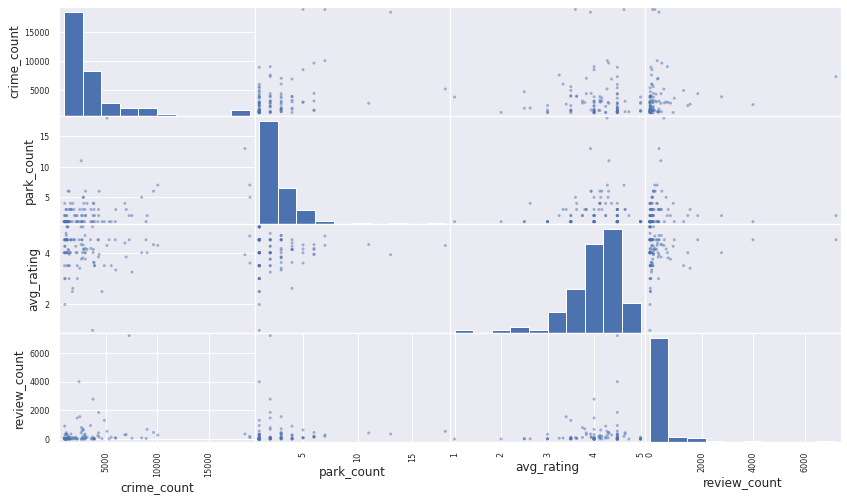

In [24]:
#Creating a scatter plot matrix for crime_rate_df 
sns.set(font_scale = 1)
plot = pd.plotting.scatter_matrix(crime_rate_df[['crime_count','park_count', 'avg_rating', 'review_count']], figsize=[14,8])

Figure 1: Scatterplot matric of columns in crime_rate_df

This initial view of some of the plots such as crime count, park count and review count still look a little skewed towards the left even after dropping the bottom 5% of the crime count per street. Regardless, this skewedness still entails a lot about the distribution of crime rates, number of parks and number of reviews for streets around San Diego. 

## Data Visualization

Text(0.5, 0, 'Number of crimes')

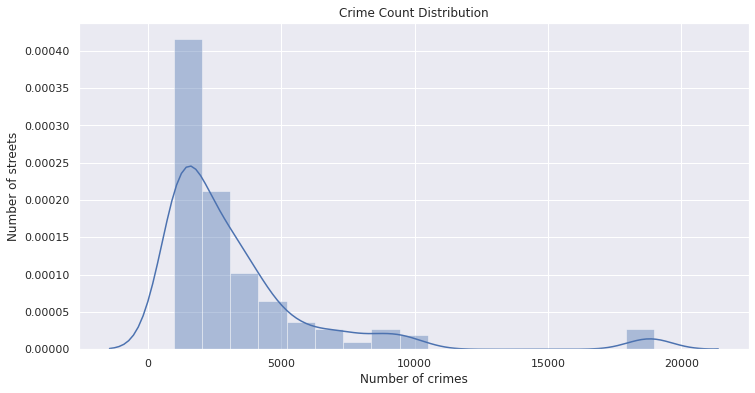

In [25]:
plt.figure(figsize = (12,6))
plot = sns.distplot(crime_rate_df['crime_count'], kde=True)
plot.set_title('Crime Count Distribution')
plot.set_ylabel('Number of streets')
plot.set_xlabel('Number of crimes')

Figure 2: Crime Count Distribution. 

There are a few streets with extremely high crime counts of 18984. However, majority of the streets in San Diego have crime counts in the range of 2000 - 5000 from 2019 to 2020. 

Text(0.5, 0, 'Number of crimes')

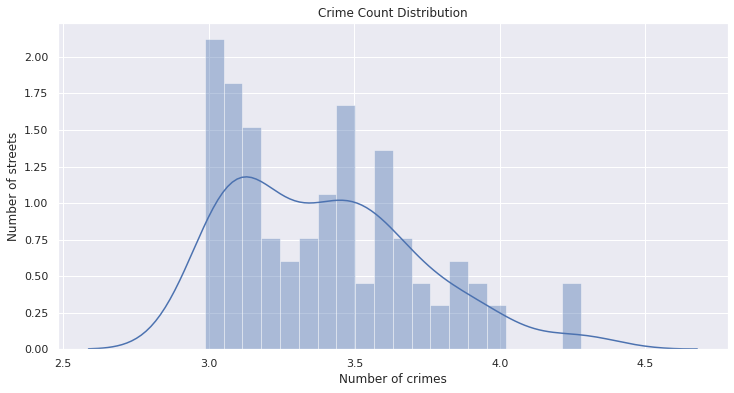

In [26]:
#Looking at log transformed data to give a different perspective of the data
plt.figure(figsize = (12,6))
plot = sns.distplot(np.log10(crime_rate_df['crime_count'][crime_rate_df['crime_count'].notnull()]), kde=True, bins=20)
plot.set_title('Crime Count Distribution')
plot.set_ylabel('Number of streets')
plot.set_xlabel('Number of crimes')

Figure 3: Log transformed Crime Count Distribution

This graph gives a different perspective to the crime count distribution. Although a marjority of the streets still have lower crime counts, there is also some streets distributed in the middle, showing a more even distribution. 

Text(0.5, 0, 'Average yelp ratings')

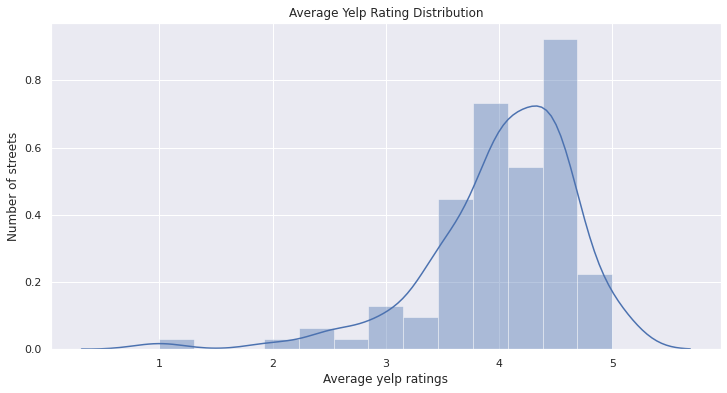

In [27]:
plt.figure(figsize = (12,6))
plot = sns.distplot(crime_rate_df['avg_rating'], kde=True)
plot.set_title('Average Yelp Rating Distribution')
plot.set_ylabel('Number of streets')
plot.set_xlabel('Average yelp ratings')

Figure 4: Average Yelp Rating of Parks Distribution 

This graph demonstrates that a majority of the parks per street have a rating above 3.0 out of 5.0. 

Text(0.5, 0, 'Number of parks')

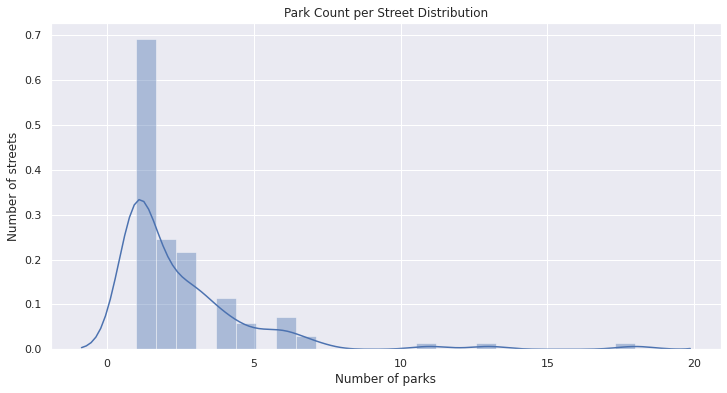

In [28]:
plt.figure(figsize = (12,6))
plot = sns.distplot(crime_rate_df['park_count'], kde=True, bins = 25)
plot.set_title('Park Count per Street Distribution')
plot.set_ylabel('Number of streets')
plot.set_xlabel('Number of parks')

Figure 5: Park Count per Street Distribution 

This graph demonstrates that majority of the streets have 1 - 2 parks and there are a few cases which the streets have a high number of parks located on them. 

Text(0.5, 0, 'Number of reviews')

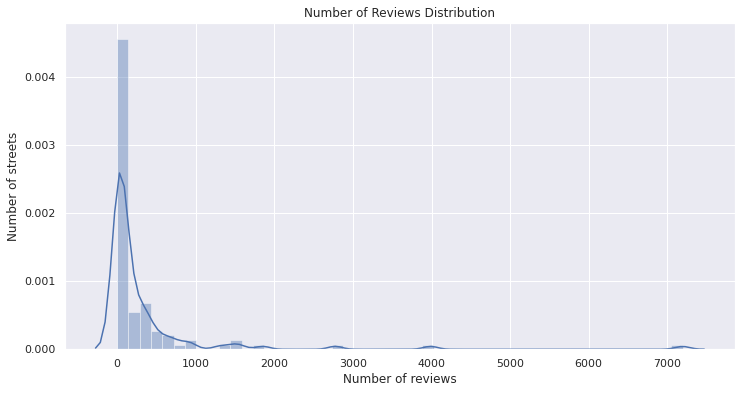

In [29]:
plt.figure(figsize = (12,6))
plot = sns.distplot(crime_rate_df['review_count'], kde=True)
plot.set_title('Number of Reviews Distribution')
plot.set_ylabel('Number of streets')
plot.set_xlabel('Number of reviews')

Figure 6: Number of Reviews Distribution

This plot demonstrates that a majority of streets were only reviewed once. There are a few streets that have a lot of reviews, over 3000, potentially due to the higher number of parks on the streets. 

Text(0.5, 0, 'Number of reviews')

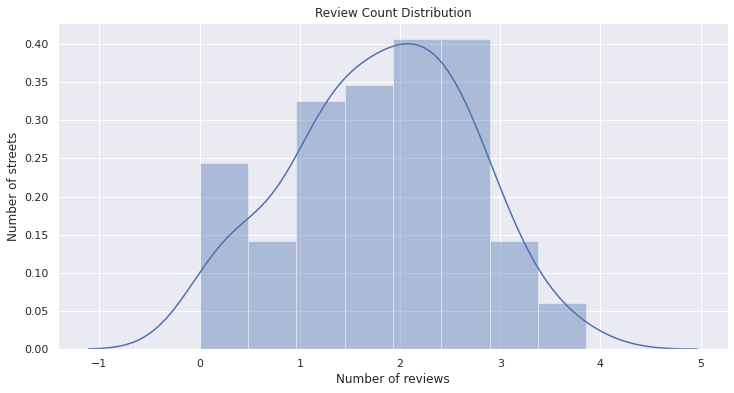

In [30]:
# log transformed data
plt.figure(figsize = (12,6))
plot = sns.distplot(np.log10(crime_rate_df['review_count'][crime_rate_df['review_count'].notnull()]), kde=True)
plot.set_title('Review Count Distribution')
plot.set_ylabel('Number of streets')
plot.set_xlabel('Number of reviews')

Figure 7: Log transformed Review Count Distribution 

The log transformed plot of number of review counts per street gives a less skewed perspective of the original graph. 

## Relationship between different variables  

After looking at the plots initially, I got a general understanding about the data and started looking into potential relationships between different variables. 

#### Relationship between the number of crimes and average yelp rating per street

Text(-8.665000000000006, 0.5, 'Number of crimes')

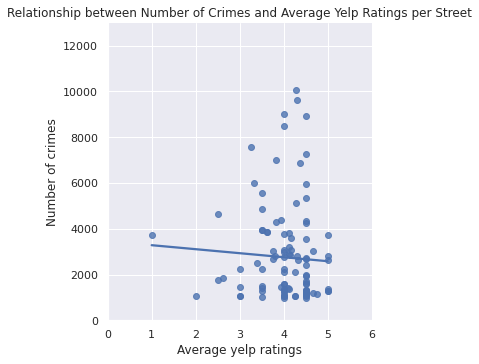

In [31]:
plot = sns.lmplot(x = 'avg_rating', y = 'crime_count', data = crime_rate_df, robust=True, ci=None).set(xlim=(0, 6), ylim=(0, 13000))
plt.title('Relationship between Number of Crimes and Average Yelp Ratings per Street' )
plt.xlabel('Average yelp ratings')
plt.ylabel('Number of crimes')


Figure 8: Relationship between Number of Crimes and Average Yelp Ratings per street

This scatterplot shows a slight negative correlation between the number of crimes and average yelp ratings per street. 
Decrease in the number of crimes is associated with an increase in the average yelp ratings per street. 

Text(-8.665000000000006, 0.5, 'Number of crimes')

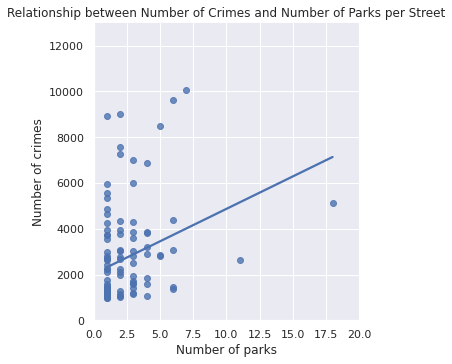

In [32]:
plot = sns.lmplot(x = 'park_count', y = 'crime_count', data = crime_rate_df, robust=True, ci=None).set(xlim=(0, 20), ylim=(0, 13000))
plt.title('Relationship between Number of Crimes and Number of Parks per Street')
plt.xlabel('Number of parks')
plt.ylabel('Number of crimes')

Figure 9: Relationship between the Number of Crimes and Number of Parks per street

This scatterplot shows a poitive correlation between the number of crimes and number of parks per street.
The increase of crimes per street is correlated with the increase of the number of parks on that street.

# Ethics & Privacy

In order to protect the privacy of the parks, I dropped columns that contain phone numbers and ID. Even though the phone numbers are made public, it still may be some park's managers personal phone number. For additional caution, these information will be dropped from this project. 

On the other hand, there are a few ethical concerns that might arise if people use the results of this project with unethical intentions. Therefore, I will address the goal of this project and also warn readers about potential bias of this project to avoid misusing of results. Firstly, this project is intended to look at relationships between crime rate and other aspects of parks in San Diego so that the San Diego Parks and Recreation Department may be able to use these correlations to make better decisions about future park locations or additional safety measures for certain areas with more parks. It is important to understand that the results should not be used to deduce which street is more susceptible to crime and easier to target on. Moreover, the datasets used are specific to San Diego. Therefore, the result of this project cannot be generalized to the areas beyond San Diego. Lastly, I think it is crucial to stress that there are a lot of other reasons that could contribute to the high number of crimes committed on a street. Although there seems to be a correlation between high number of crimes and high number of parks on a street, correlation is not causation and parks should not be limited as a resources in order to avoid crimes, which is not the purpose behind this project. 

# Conclusion & Discussion

After conducting a data analysis on the topic of San Diego Parks and Recreation, specifically investigating in the relationship between the crime rates, the number of parks and the average yelp reviews received by the parks in San Diego, I conclude that there is a correlation between these variables I am analyzing. Additionally, an increase in crime rate of a street is correlated with an increase of number of parks of the same street. Secondly, an increase in crime rate also correlates with a decrease in the average yelp reviews of the street. As a result, these conclusions match with my initial hypothesis. 

However, there are a few limitations to my data analysis process. Firstly, I tried to derive the popularity of a specific street in San Diego through combining the yelp ratings given to the parks located on that street. This is a limitation because the reviews are given to the parks instead of to the streets directly. However, with limited datasets available and for the purpose of this project, I assume that a review given to a park is also a review or rating for the location of the park which is the street. Therefore, the correlation between high crime rate and low yelp ratings of a street might be affected by this limitation. On the other hand, the second limitation is that the datasets have very extreme values. For example, some streets are very long and have 10 more parks than other streets in San Diego. Lastly, the error I mentioned during the data cleaning process could also be a limitation to this project. Since I am not very skilled at developing codes and do not have a lot of coding experience, the more complex code I wrote for cross referencing the addresses from the San Diego crime datasets and the San Diego park yelp reviews dataset produced inconsistency. For example, the code will consider 'hancock st' as 'k st' as well because the alphabet 'k st' is in 'hancock st'. Luckily, I realized this inconsistency early and tried my best to manually fix it. However, this also shows there might be human bias or error existing in my project. 

Although this project has been challenging, I enjoyed standardizing, cleaning, and analyzing the datasets in order to answer my research question and find answers to my hypothesis. I believe this project will be able to help the San Diego Parks and Recreation Department to obtain a general understanding about the relationship between crimes and parks in San Diego and be able to find solutions that will ensure safety and security of the parks in the future. 